# Mid Semester Project - DEEP Reinforcements Learning
### Part 3: Inference

Student: Jonathan Mendelson 308564293


##### Imports

In [2]:
# general utils
import os

# torch
import torch

# my imports
from src.display_utils import embed_mp4, launch_tb, plot_metrics
from src.utils import record_agent_video, build_envs, evaluate_agent
from src.cnn_policy import CNNPolicyNetwork

# notebook setup
%load_ext autoreload
%autoreload 2

# device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Initializations
Paths and Env:

In [3]:
content_path = os.path.join('inference')

# env init
env_2_rooms, env_4_rooms, env_6_rooms = build_envs()

Agent init:

In [47]:
# REINFORCE Models
RF_2Room_path = 'experiments\RF_02\Mar-06_22-19-08\models\RF_2Room_100_10000.pt'
RF_4Room_path = 'experiments\RF_02\Mar-06_22-19-08\models\RF_4Room_2000_5000_4.pt'
RF_6Room_path = 'experiments\RF_02\Mar-06_22-19-08\models\RF_6Room_200_5000_6.pt'

RF_2Room_model = CNNPolicyNetwork(device, env_2_rooms.action_space.n)
RF_4Room_model = CNNPolicyNetwork(device, env_2_rooms.action_space.n)
RF_6Room_model = CNNPolicyNetwork(device, env_2_rooms.action_space.n)

RF_2Room_model.load_state_dict(torch.load(RF_2Room_path, map_location = device))
RF_4Room_model.load_state_dict(torch.load(RF_4Room_path, map_location = device))
RF_6Room_model.load_state_dict(torch.load(RF_6Room_path, map_location = device))

RF_2Room_model.eval();
RF_4Room_model.eval();
RF_6Room_model.eval();

In [19]:
# A2C Models
A2C_2Room_path = 'experiments\A2C_04\Mar-08_22-39-37\models\A2C_2Room_100_6000.pt'
# A2C_4Room_path = ''
# A2C_6Room_path = 'A2c'

A2C_2Room_model = CNNPolicyNetwork(device, env_2_rooms.action_space.n, critic = True)
# A2C_4Room_model = CNNPolicyNetwork(device, env_2_rooms.action_space.n, critic = True)
# A2C_6Room_model = CNNPolicyNetwork(device, env_2_rooms.action_space.n, critic = True)

A2C_2Room_model.load_state_dict(torch.load(A2C_2Room_path, map_location = device))
# A2C_4Room_model.load_state_dict(torch.load(AC_4Room_path, map_location = device))
# A2C_6Room_model.load_state_dict(torch.load(AC_6Room_path, map_location = device))

A2C_2Room_model.eval();
# A2C_4Room_model.eval();
# A2C_6Room_model.eval();

## Two Room Environemnt
In this section we will evaluate the preformance of the agent on the two room environmets. The agents we will use:
| Algorithm      | Training Episodes  | Env Max Steps|
|----------------|----------------|------|
| REINFORCE      | 10K         | 40|
| A2C         | 5K        |40

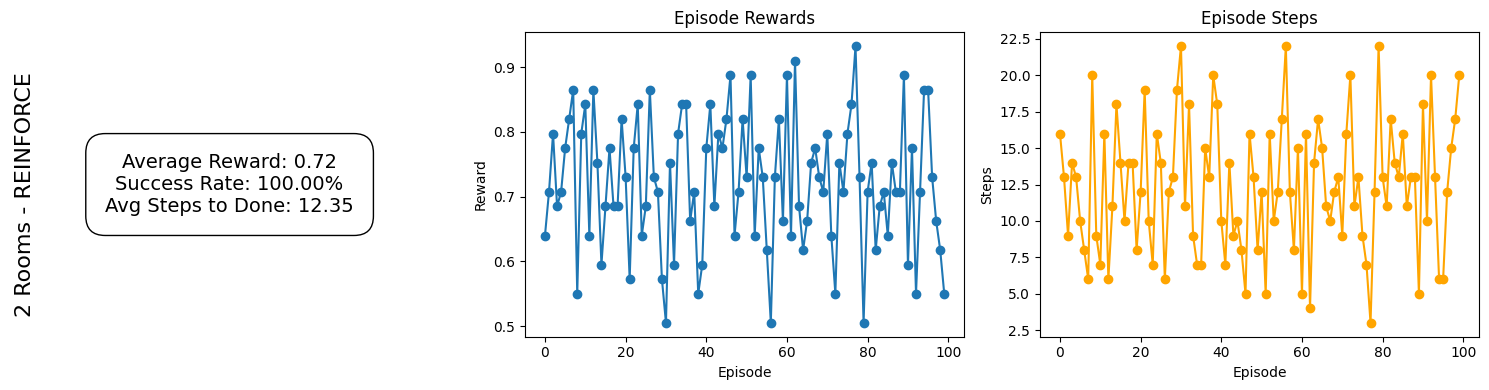

In [ ]:
RF_metrics = evaluate_agent(RF_2Room_model, env_2_rooms, num_episodes=100)
plot_metrics(RF_metrics, model_name='2 Rooms - REINFORCE')

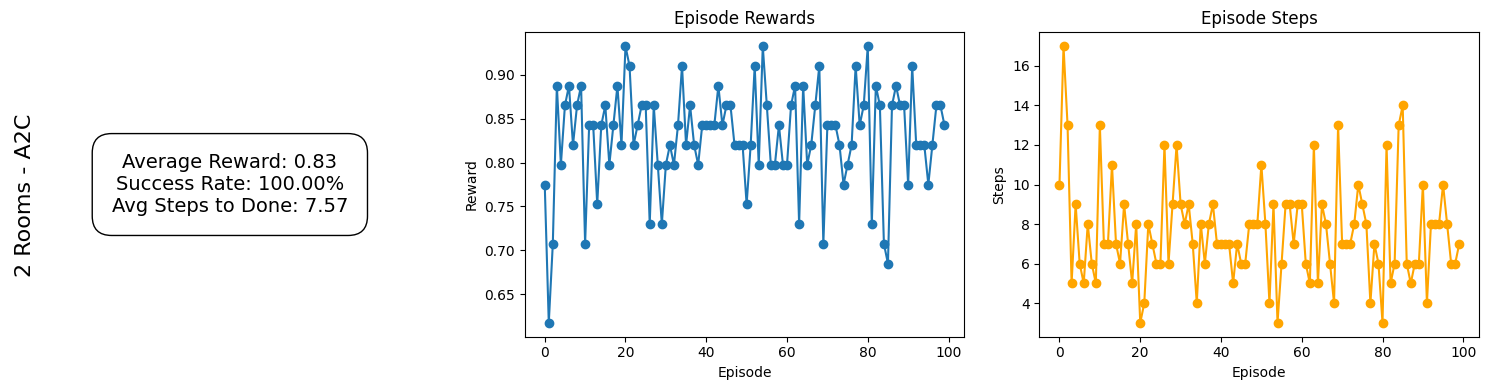

In [21]:
A2C_metrics = evaluate_agent(A2C_2Room_model, env_2_rooms, num_episodes=100)
plot_metrics(A2C_metrics, model_name='2 Rooms - A2C')

### Video Example:
REINFORCE Agent:

In [36]:
video_path = os.path.join(content_path, '2Room_RF.mp4')
vid = record_agent_video(RF_2Room_model, env_2_rooms, video_path)
embed_mp4((video_path))

A2C Agent:

In [23]:
video_path = os.path.join(content_path, '2Room_A2C.mp4')
vid = record_agent_video(A2C_2Room_model, env_2_rooms, video_path)
embed_mp4((video_path))

## Four Room Environemnt
In this section we will evaluate the preformance of the agent on the 4 room environmet. The agents we will use:
| Algorithm      | Training Episodes  | Env Max Steps|
|----------------|----------------|------|
| REINFORCE      | 15k        | 120|
| A2C         | Step 2         |

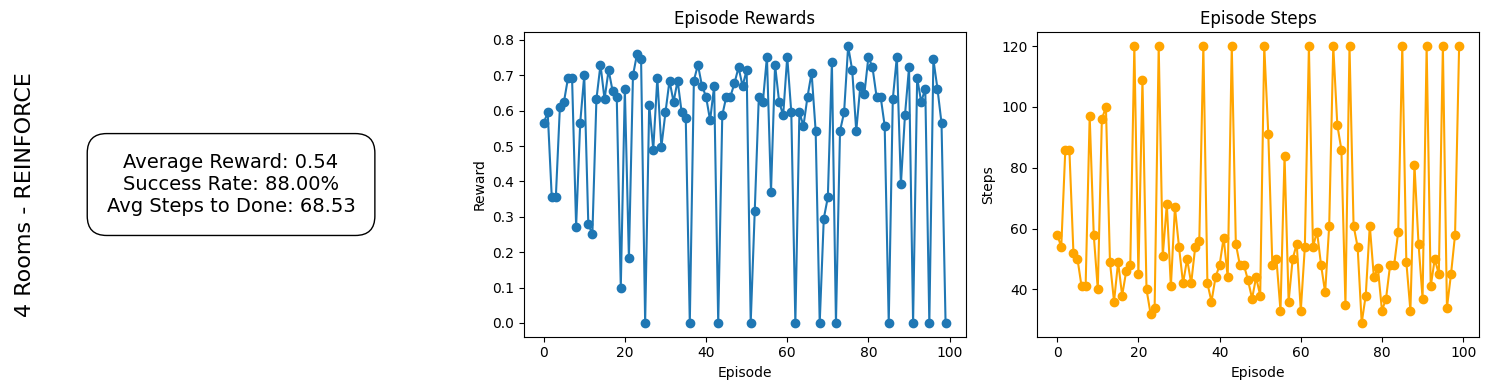

In [37]:
RF_metrics = evaluate_agent(RF_4Room_model, env_4_rooms, num_episodes=100)
plot_metrics(RF_metrics, model_name='4 Rooms - REINFORCE')

In [38]:
video_path = os.path.join(content_path, '4Room_RF.mp4')
vid = record_agent_video(RF_4Room_model, env_4_rooms, video_path)
embed_mp4((video_path))

## Six Room Environemnt
In this section we will evaluate the preformance of the agent on the six room environmet. The agents we will use:
| Algorithm      | Training Episodes  | Env Max Steps|
|----------------|----------------|------|
| REINFORCE      | 45K         | 120|
| A2C         | Step 2         |

REINFORCE Agent:

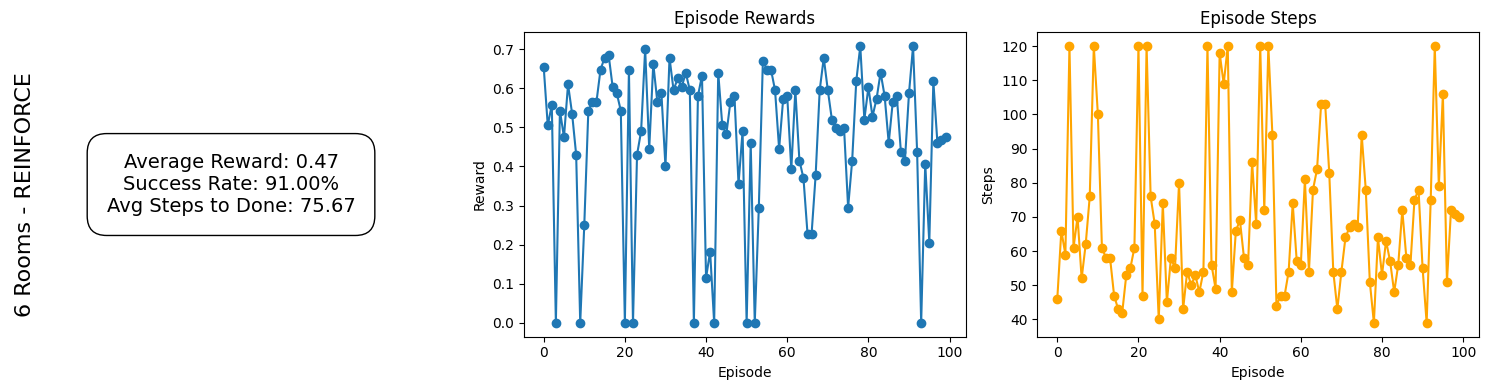

In [58]:
RF_metrics = evaluate_agent(RF_6Room_model, env_6_rooms, num_episodes=100)
plot_metrics(RF_metrics, model_name='6 Rooms - REINFORCE')

In [54]:
video_path = os.path.join(content_path, '6Room_RF.mp4')
vid = record_agent_video(RF_6Room_model, env_6_rooms, video_path)
embed_mp4((video_path))

A2C Agent: